### Student Information
Name:郭蕙綺

Student ID:106062212

GitHub ID: Cathy-Kuo

Kaggle name: Cathy_DS

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

In [2]:
### Begin Assignment Here

In [8]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
print(train_df.head())

# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

      id                                               text emotion  intensity
0  10000  How the fu*k! Who the heck! moved my fridge!.....   anger      0.938
1  10001  So my Indian Uber driver just called someone t...   anger      0.896
2  10002  @DPD_UK I asked for my parcel to be delivered ...   anger      0.896
3  10003  so ef whichever butt wipe pulled the fire alar...   anger      0.896
4  10004  Don't join @BTCare they put the phone down on ...   anger      0.896
Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect_train = CountVectorizer()
train_counts = count_vect_train.fit_transform(train_df.text)

count_vect_train.get_feature_names()[0:10]
train_counts.shape

count_vect_test = CountVectorizer()
test_counts = count_vect_test.fit_transform(test_df.text)

count_vect_test.get_feature_names()[0:10]
test_counts.shape



(347, 1949)

In [10]:
train_words_s = train_counts.sum(axis = 0)
test_words_s = test_counts.sum(axis = 0)

In [11]:
train_words = []
train_freq = []
for item in count_vect_train.vocabulary_.items():
    train_words.append(item[0])
    train_freq.append(train_words_s[0,item[1]])
d_train = {"words" : train_words, "freq" : train_freq}
df_train_freq = pd.DataFrame(d_train)
df_train_freq = df_train_freq.sort_values(by=['freq'], ascending=False)
print(df_train_freq[0:5])

test_words = []
test_freq = []
for item in count_vect_test.vocabulary_.items():
    test_words.append(item[0])
    test_freq.append(test_words_s[0,item[1]])
d_test = {"words" : test_words, "freq" : test_freq}
df_test_freq = pd.DataFrame(d_test)
df_test_freq = df_test_freq.sort_values(by=['freq'], ascending=False)
df_test_freq[0:5]

    words  freq
7     the  1736
44     to  1289
53    and   955
258   you   796
27     of   793


,words,freq
27,the,153
3,to,138
8,and,92
0,it,83
147,of,83


In [12]:
#Plot word frequency for Top 30 words in train dataset.
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context(rc={"font.size":50})   
plt.subplots(figsize=(100, 30))
g = sns.barplot(x=list(df_train_freq['words'][:30]), y=list(df_train_freq['freq'][:30]))
g.set_xticklabels(list(df_train_freq['words'][:30]), rotation = 90);

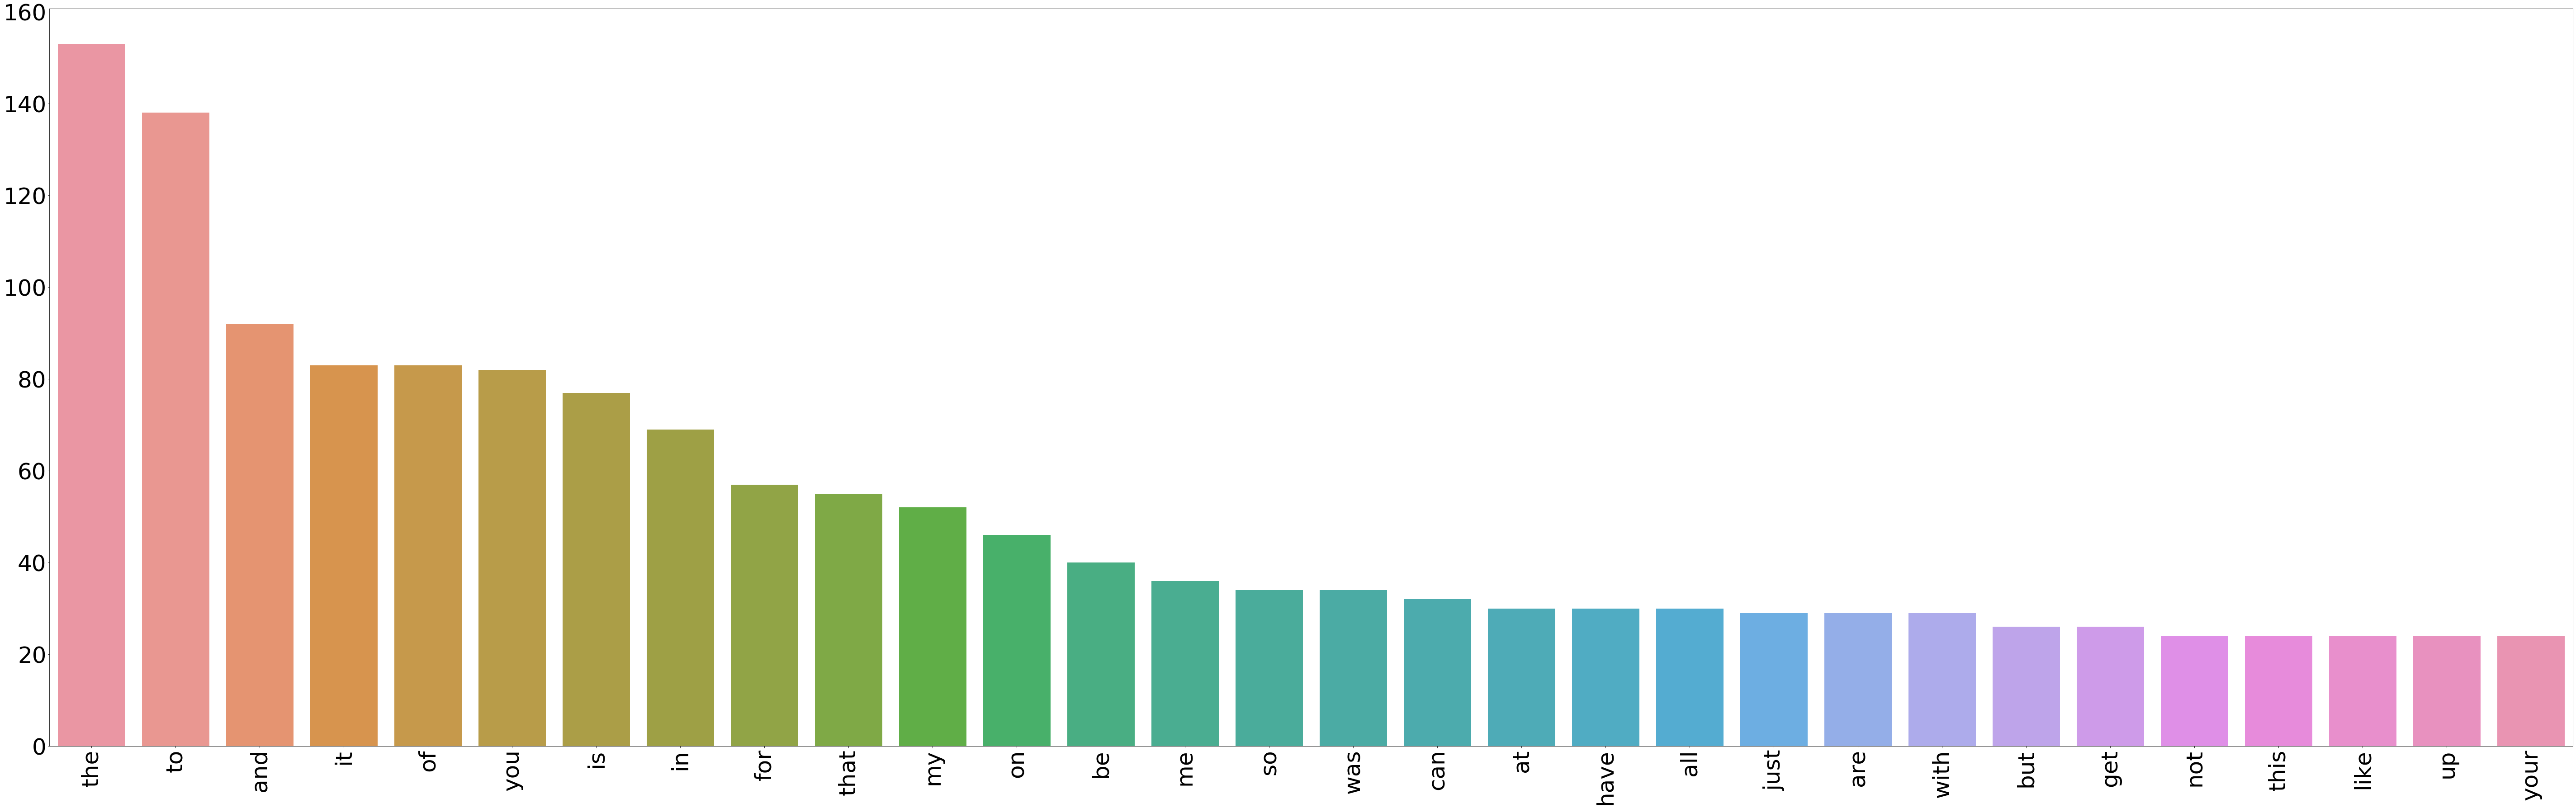

In [13]:
#Plot word frequency for Top 30 words in test dataset.
sns.set_context(rc={"font.size":50})   
plt.subplots(figsize=(100, 30))
g = sns.barplot(x=list(df_test_freq['words'][:30]), y=list(df_test_freq['freq'][:30]))
g.set_xticklabels(list(df_test_freq['words'][:30]), rotation = 90);

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [14]:
# Answer here
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

tfIdfVectorizer_100 = TfidfVectorizer(max_features = 1000, tokenizer=nltk.word_tokenize, use_idf=True)

tfIdfVectorizer_100.fit(train_df['text'])

train_data_tf_features_100 = tfIdfVectorizer_100.transform(train_df['text'])

## check dimension
# print(train_data_tf_features_100.shape)

train_data_tf_features_100.toarray()

feature_names_100 = tfIdfVectorizer_100.get_feature_names()
feature_names_100[100:110]

['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday']

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

# Answer here
According to the confusion matrix, we can see that the most misclassification label of "anger" is "fear", also, the most misclassification label of "fear" is "anger". So, they may have higher connection.
Furthermore, the most misclassification label of "sadness" is "fear"(42:14), we can think that the fear and sadness situation might be common.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
BOW_vectorizer = CountVectorizer() 
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
BOW_500.fit(train_df['text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=500, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function word_tokenize at 0x7f91a7ff2f80>,
        vocabulary=None)

In [16]:
from sklearn.naive_bayes import GaussianNB


X_train = BOW_500.transform(train_df['text']).toarray()
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text']).toarray()
y_test = test_df['emotion']

NB_model = GaussianNB()
NB_model = NB_model.fit(X_train, y_train)

y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)



In [17]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

training accuracy: 0.77
testing accuracy: 0.67
              precision    recall  f1-score   support

       anger       0.57      0.76      0.65        84
        fear       0.80      0.63      0.70       110
         joy       0.65      0.81      0.72        79
     sadness       0.70      0.47      0.56        74

   micro avg       0.67      0.67      0.67       347
   macro avg       0.68      0.67      0.66       347
weighted avg       0.69      0.67      0.67       347

[[64  8  9  3]
 [22 69 12  7]
 [ 9  1 64  5]
 [18  8 13 35]]


In [18]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(15,15))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

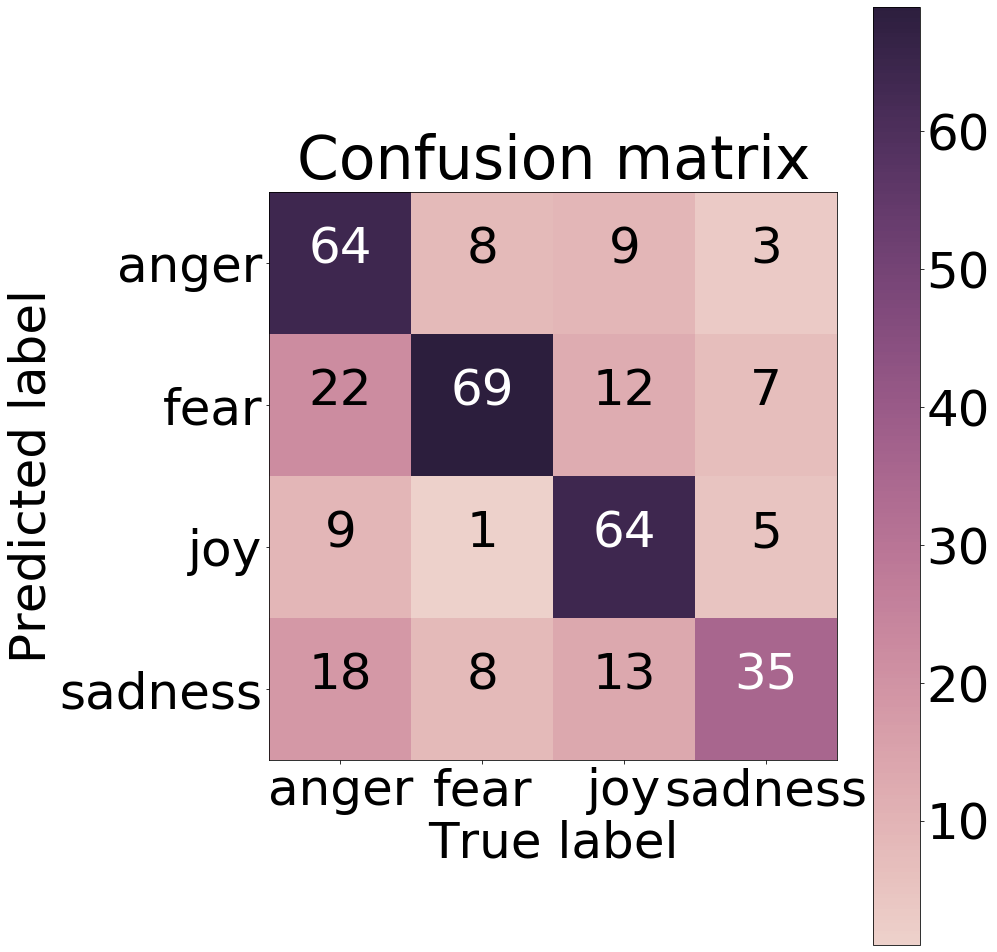

In [19]:
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

#Answer here

The training accuracy of Decision Tree model is 0.99, and the testing accuracy is 0.64.
The training accuracy of Naive Bayes model is 0.77, and the testing accuracy is 0.67.
We can easily see that Decision Tree model might be overfitting with training data.
Although the training accuracy of Naive Bayes model is much lower than Decision Tree model, its testing accuracy is higher than Decision Tree model.

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

### 6.1 Prepare data (X, y)

In [20]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [21]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1908     fear
572     anger
2249      joy
1470     fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [22]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [23]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                32064     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax (Softmax)            (None, 4)                 0     

### 6.4 Train

In [24]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 0s 3ms/step - loss: 1.3270 - accuracy: 0.3759 - val_loss: 1.2759 - val_accuracy: 0.4236
Epoch 2/25
113/113 [==============================] - 0s 1ms/step - loss: 0.9717 - accuracy: 0.6546 - val_loss: 0.8772 - val_accuracy: 0.6628
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.5698 - accuracy: 0.7996 - val_loss: 0.7581 - val_accuracy: 0.7032
Epoch 4/25
113/113 [==============================] - 0s 3ms/step - loss: 0.4055 - accuracy: 0.8539 - val_loss: 0.7604 - val_accuracy: 0.6888
Epoch 5/25
113/113 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.8882 - val_loss: 0.8106 - val_accuracy: 0.6916
Epoch 6/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2577 - accuracy: 0.9148 - val_loss: 0.8818 - val_accuracy: 0.6715
Epoch 7/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2128 - accuracy: 0.9286 - val_loss: 0.9452 - val_accuracy: 0.6801
Epoch 

### 6.5 Predict on testing data

In [25]:
## predict
pred_result = model.predict(X_test, batch_size=128)
print(pred_result[:5])

pred_result = label_decode(label_encoder, pred_result)
print(pred_result[:5])

[[2.5870081e-04 5.3562107e-04 3.1375774e-05 9.9917430e-01]
 [8.0493689e-01 1.4307524e-05 1.6376925e-01 3.1279482e-02]
 [1.0293161e-04 1.9329111e-06 5.3511048e-03 9.9454403e-01]
 [7.8571382e-08 2.3053763e-05 2.4150138e-05 9.9995267e-01]
 [1.4709092e-02 9.2047894e-01 3.9609180e-08 6.4812049e-02]]
['sadness' 'anger' 'sadness' 'sadness' 'fear']


In [26]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.68


In [27]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.375865,1.326981,0.423631,1.275903
1,1,0.654581,0.971666,0.662824,0.877195
2,2,0.799613,0.569808,0.703170,0.758140
3,3,0.853861,0.405495,0.688761,0.760442
4,4,0.888182,0.315164,0.691643,0.810635
5,5,0.914752,0.257658,0.671470,0.881834
6,6,0.928591,0.212842,0.680115,0.945210
7,7,0.941600,0.176870,0.685879,1.018760
8,8,0.949073,0.157115,0.671470,1.083553
9,9,0.957653,0.136176,0.688761,1.120430


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

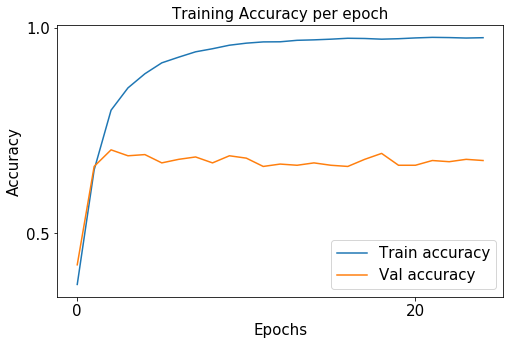

In [28]:
# Answer here
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(training_log['accuracy'], label="Train accuracy")
plt.plot(training_log['val_accuracy'], label="Val accuracy")
plt.title("Training Accuracy per epoch",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc = "best", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

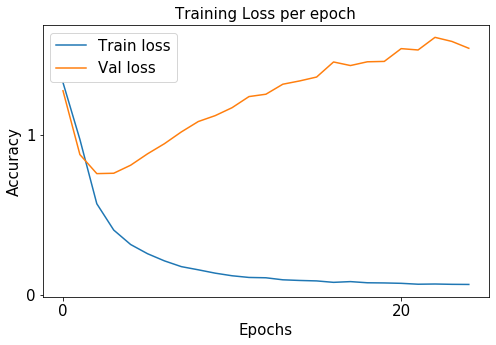

In [29]:
plt.figure(figsize=(8,5))
plt.plot(training_log['loss'], label="Train loss")
plt.plot(training_log['val_loss'], label="Val loss")
plt.title("Training Loss per epoch",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc = "best", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

We can see that the training accuracy get close to 1 when the epoch >12, however, the validation loss get higher and higher.
This situation means that the model is overfitting with the training data. It just can predict training data precisely. It hard to predict other data which means that it's not a good model.

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [30]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1908,21051,Pretty excited for American horror story tonight,"[Pretty, excited, for, American, horror, story..."
572,10572,the 1975 are playing antichrist why won't @sun...,"[the, 1975, are, playing, antichrist, why, wo,..."
2249,30245,Being a veteran just totally got me out of a t...,"[Being, a, veteran, just, totally, got, me, ou..."
1470,20613,@kevinrouth Now that's what I call a gameface!...,"[@, kevinrouth, Now, that, 's, what, I, call, ..."
653,10653,"@sippycoups if it hurts too much to eat, i rea...","[@, sippycoups, if, it, hurts, too, much, to, ..."


In [31]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Pretty', 'excited', 'for', 'American', 'horror', 'story', 'tonight']),
       list(['the', '1975', 'are', 'playing', 'antichrist', 'why', 'wo', "n't", '@', 'sundarakarma', 'play', 'hustle', 'it', "'s", 'an', 'outrage']),
       list(['Being', 'a', 'veteran', 'just', 'totally', 'got', 'me', 'out', 'of', 'a', 'ticket', '.', 'I', "'m", 'elated', 'right', 'now', ',', 'close', 'call', '.'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [32]:
## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1908,21051,Pretty excited for American horror story tonight,"[Pretty, excited, for, American, horror, story..."
572,10572,the 1975 are playing antichrist why won't @sun...,"[the, 1975, are, playing, antichrist, why, wo,..."
2249,30245,Being a veteran just totally got me out of a t...,"[Being, a, veteran, just, totally, got, me, ou..."
1470,20613,@kevinrouth Now that's what I call a gameface!...,"[@, kevinrouth, Now, that, 's, what, I, call, ..."
653,10653,"@sippycoups if it hurts too much to eat, i rea...","[@, sippycoups, if, it, hurts, too, much, to, ..."


In [33]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

### 7.3 Generating word vector (embeddings)

In [43]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 4.16239411e-01, -5.97412229e-01, -6.70353696e-02, -1.43174119e-02,
       -9.15871799e-01, -6.35185167e-02, -7.30096638e-01, -7.97356188e-01,
        6.11591749e-02,  1.91684693e-01,  4.50147241e-01, -5.02047718e-01,
        4.62690070e-02,  3.37976277e-01,  2.07308948e-01,  5.01924217e-01,
        3.41559619e-01,  8.36363733e-01,  5.44970930e-01,  7.80803934e-02,
       -1.99977636e-01, -5.04815876e-01,  2.20766202e-01, -8.11465561e-01,
       -5.41936159e-01,  6.58101976e-01, -2.73708582e-01, -6.32636607e-01,
       -8.05420280e-01,  5.07150233e-01,  2.11418331e-01, -9.55490351e-01,
       -1.98851824e-01,  9.38839372e-03,  7.78878808e-01,  3.18267494e-02,
        7.05029845e-01, -3.76741737e-01,  4.99808550e-01, -7.39885747e-01,
        9.97306481e-02, -8.53512049e-01, -2.09781080e-01,  1.53109670e-01,
        3.57526056e-02, -4.64063212e-02, -1.83992293e-02,  7.88747013e-01,
        2.93593585e-01,  8.22890699e-01,  2.95892009e-04, -2.41648957e-01,
        4.30513583e-02, -

In [44]:
len(word_vec)

100

In [45]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.most_similar(word, topn=topn)

[("'you", 0.9379926919937134),
 ('kinda', 0.9305124878883362),
 ('dad', 0.9293050169944763),
 ('O', 0.9284913539886475),
 ('blessed', 0.9280405044555664),
 ('plz', 0.9275750517845154),
 ('help', 0.9273276329040527),
 ('establishment', 0.9270424842834473),
 ('-APJ', 0.923580527305603),
 ('Be', 0.9230225086212158)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [38]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890128135681),
 ('pleased', 0.6632171273231506),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247666478157043)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [39]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577817916870117),
 ('thank', 0.9376667141914368),
 ('welcome', 0.9336150288581848),
 ('love', 0.9176183938980103),
 ('miss', 0.916450023651123),
 ('hello', 0.9158351421356201),
 ('thanks', 0.9150084257125854),
 ('merry', 0.9053248763084412),
 ('bless', 0.9027323126792908),
 ('wish', 0.9013165831565857)]

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [40]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


# Answer here
I think that there are 2 methods to solve this question.
1. We can just take the average of all the word vectors in a sentence. This average vector will represent the sentence vector.
2. Take the word vectors and multiply it with their TF-IDF scores. Just take the average and it will represent the sentence vector.


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, tf-idf, or word2vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient...

Our aim will be to create a visualization similar to the one below:

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [48]:
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'e

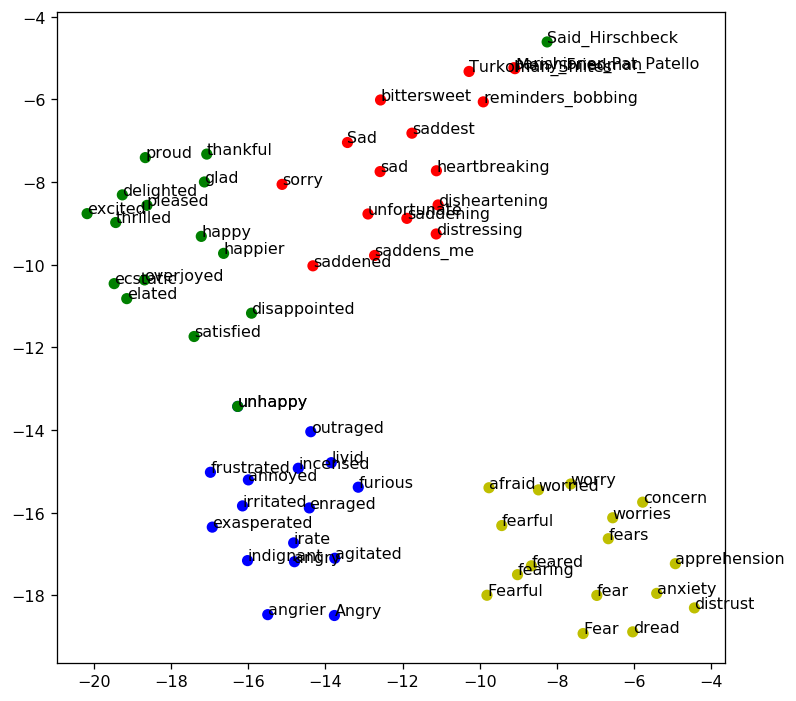

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# Kaggle competition

First, I transfer tweet_DM.json to tweet_.csv and read all the files.
Next, do some data preprocessing: spilt them into df_train and df_test and merge the ground truth of train data.

In [ ]:
import pandas as pd
import numpy as np

tweets = pd.read_json('tweets_DM.json', lines=True)
tweets.head()
print(tweets['_type'].value_counts())
print(tweets['_index'].value_counts())
tweets = tweets.drop(columns=['_type', '_index', '_crawldate'],axis=1)
tweets['tweets'] = tweets['_source'].apply(pd.Series)
tweets = pd.concat([tweets['_score'],
                     tweets['tweets'].apply(pd.Series)], axis=1)
tweets.head()
tweets.to_csv('tweet_.csv',encoding='utf-8')

In [ ]:
all_user = pd.read_csv("data_identification.csv")
tweets = pd.read_csv("tweet_.csv", lineterminator='\n')
tweets = tweets.drop(columns=['Unnamed: 0'], axis=1)
print(all_user.shape)
print(tweets.shape)
tweets.head()

all_user = pd.merge(all_user,tweets, on="tweet_id")
all_user.head()

In [ ]:
fliter = (all_user["identification"] == 'train')
df_train = all_user[fliter]
fliter1 = (all_user["identification"] == 'test')
df_test = all_user[fliter1]
print(df_train.head(), df_train.shape)
print(df_test.head(), df_test.shape)

emotion = pd.read_csv("emotion.csv")
df_train = pd.merge(df_train,emotion, on="tweet_id")
df_train.iloc[4:100]

df_train = df_train.drop(columns=['identification'],axis=1)
df_test = df_test.drop(columns=['identification'],axis=1)

I combine 'hashtag' and 'text' columns to 'Full_text' here.

In [ ]:
import string

list_hash = df_train['hashtags'].tolist()
for i in range(len(list_hash)):
    if len(list_hash[i]) == 0:
        list_hash[i]=None
    else:
        list_hash[i]=list_hash[i][1:len(list_hash[i])-2]
        list_hash[i] = [word.strip(string.punctuation) for word in list_hash[i].split(", ")]
        list_hash[i] = ' '.join(list_hash[i])
df_train['hashtags'] = list_hash
df_train["Full_text"] = df_train["hashtags"] + " " + df_train["text"]
df_train.head()

list_hash = df_test['hashtags'].tolist()
for i in range(len(list_hash)):
    if len(list_hash[i]) == 0:
        list_hash[i]=None
    else:
        list_hash[i]=list_hash[i][1:len(list_hash[i])-2]
        list_hash[i] = [word.strip(string.punctuation) for word in list_hash[i].split(", ")]
        list_hash[i] = ' '.join(list_hash[i])
df_test['hashtags'] = list_hash
df_test["Full_text"] = df_test["hashtags"] + " " + df_test["text"]
df_test.head()


Shuffle train data.

In [ ]:
from sklearn.utils import shuffle
df_train = shuffle(df_train)  
df_train['emotion'].unique()

I use 'Bert' model from google to train this HW.

In [ ]:
from transformers import *
from transformers import TFBertForSequenceClassification, BertTokenizer, TFBertModel, BertConfig
bert_tokenizer = BertTokenizer.from_pretrained("./bert-base-uncased/")
bert_model = TFBertForSequenceClassification.from_pretrained('./bert-base-uncased/',num_labels=8, from_pt=True, force_download=True)

To use this model, the label(emotion column) should be transfered to numbers.

In [ ]:
import tensorflow as tf
df_train['gt'] = df_train['emotion'].map({'joy':0,'sadness':1, 'anticipation':2,'trust':3, 'surprise':4,'fear':5, 'disgust':6,'anger':7})
df_train.head()

In [ ]:
sentences=df_train['Full_text']
labels=df_train['gt']
len(sentences),len(labels)

Take some structure which is used to put in the model.

In [ ]:
input_ids=[]
attention_masks=[]

for sent in sentences:
    bert_inp=bert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =64,pad_to_max_length = True,return_attention_mask = True)
    input_ids.append(bert_inp['input_ids'])
    attention_masks.append(bert_inp['attention_mask'])

input_ids=np.asarray(input_ids)
attention_masks=np.array(attention_masks)
labels=np.array(labels)

len(input_ids),len(attention_masks),len(labels)

sentences_ans=df_test['Full_text']

input_ids_ans=[]
attention_masks_ans=[]

for sent in sentences_ans:
    bert_inp=bert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =64,pad_to_max_length = True,return_attention_mask = True)
    input_ids_ans.append(bert_inp['input_ids'])
    attention_masks_ans.append(bert_inp['attention_mask'])

input_ids_ans=np.asarray(input_ids_ans)
attention_masks_ans=np.array(attention_masks_ans)

len(input_ids),len(attention_masks)

Split train set and validation set.

In [ ]:
from sklearn.model_selection import train_test_split
train_inp,val_inp,train_label,val_label,train_mask,val_mask=train_test_split(
    input_ids,labels,attention_masks,test_size=0.01)

Set up loss function, metric, optimizer and train the model.

In [ ]:
print('\nBert Model',bert_model.summary())

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5,epsilon=1e-08)

bert_model.compile(loss=loss,optimizer=optimizer,metrics=[metric])

history=bert_model.fit([train_inp,train_mask],train_label,
                       batch_size=32,epochs=2,
                       validation_data=([val_inp,val_mask],val_label))

Finally, predict the answer and write it into csv. file.

In [ ]:
preds = bert_model.predict([input_ids_ans, attention_masks_ans],batch_size=32)
pred_labels = preds.logits.argmax(axis=1)
df_test['emotion'] = pred_labels
df_test['ans'] = df_test['emotion'].map({0:'joy',1:'sadness', 2:'anticipation',3:'trust', 4:'surprise',5:'fear', 6:'disgust',7:'anger'})
df_test.head()

In [ ]:
df_answer = pd.concat([df_test['tweet_id'],
                     df_test['ans']], axis=1)

df_answer = df_answer.rename(columns={'tweet_id':'id', 'ans':'emotion'})
df_answer.to_csv('ans.csv',encoding='utf-8', index=False)